# Udacity Machine Learning

In the previous notebook the focus was on feature selection and tunning, in this notebook I compare various Machine Learning Algorithms and parameters in respect to the performance metrics described below. 

Performance of the *features* and *model* are based on:  

**Log Loss (Logarithmic Loss):**  
Log Loss quantifies the accuracy of a classifier by penalising false classifications i.e. minimising the Log Loss is basically equivalent to maximising the accuracy.  
Log Loss heavily penalises classifiers that are confident about an incorrect classification e.g. if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large. 

More details can be found: https://www.kaggle.com/wiki/LogarithmicLoss  

**Accuracy score:**  
The fraction of correct predictions.  

**Accuracy of the top 10:** For each k, how accurate is the model i.e. when k is set to 2, then consider a correct prediction if the predicted probability includes the correct prediction within the top 2 predictions.   

## Training Models

The following is a list of algorithms and parameters used for sketch recognition. 

### Naive Bayes Classification  
"Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features." - http://scikit-learn.org/stable/modules/naive_bayes.html

#### 1. Multinomial Naive Bayes Classifier
"The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work." - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB  

#### 2. Gaussian Naive Bayes Classifier
"GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian" - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB  

### K Nearest Neighbors Classification
"Classifier implementing the k-nearest neighbors vote." - http://scikit-learn.org/stable/modules/neighbors.html#classification  

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

#### 3. K Nearest Neighbors Classifier  

A GridSearch was performed on the parameters (with ranges/values):  
- k = 10
- algorithm = auto (attempt to decide the most appropriate algorithm based on the values passed during training) 
- Distance metrics = ['minkowski', 'euclidean', 'manhattan'] 
- weights = ['uniform', 'distance'] (uniform; all points in each neighborhood are weighted equally, distance; weight points by the inverse of their distance)

Best performed parameters (based on the GridSearch):  
- Distance metric = 'manhattan'
- weights = 'distance' 

### Support Vector Machines (SVMs)
SVMs find the "maximum-margin" line that separates the classes (line "straight in the middle"). If the data cannot be linearly separable, then SVM will project the datrums into higher dimensions (hyper planes). This can be done effectively by using kernals (known as the 'kernal trick') - http://scikit-learn.org/stable/modules/svm.html

#### 4. SVM 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  

A GridSearch was performed on the parameters (with ranges/values):  
- kernals = ['linear', 'rbf', 'poly']
- C_range = np.logspace(-2, 10, 13)
- gamma_range = np.logspace(-9, 3, 13)

Best performed parameters (based on the GridSearch):  
- kernal = RBF 
- C = 10.0 
- gamma = 10.0 

#### 5. LinearSVM
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC  

A GridSearch was performed on the parameters (with ranges/values):  
- C_range = np.logspace(-2, 10, 13)
- loss_functions = ['squared_hinge', 'hinge'] (squared_hinge; square of the hinge loss, hinge; standard SVM loss)

Best performed parameters (based on the GridSearch):  
- C = 18
- loss = 'squared_hinge'

## Model Evaluation

In [111]:
df = load_results_into_df()

### Accuracy

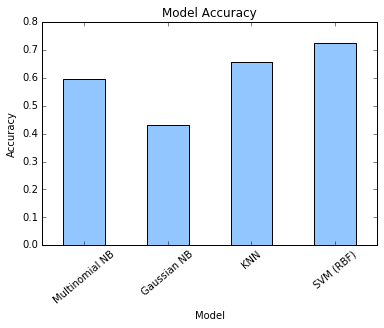

In [112]:
ax = df["accuracy"].plot(kind='bar')
ax.set_title('Model Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
_ = ax.set_xticklabels(df.index, rotation=40, ha="center")

### Log Loss 

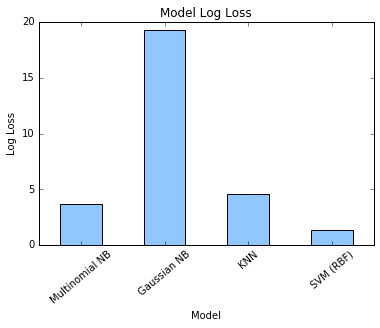

In [113]:
ax = df["log_loss"].plot(kind='bar')
ax.set_title('Model Log Loss')
ax.set_xlabel('Model')
ax.set_ylabel('Log Loss')
_ = ax.set_xticklabels(df.index, rotation=40, ha="center")

### K Accuracy

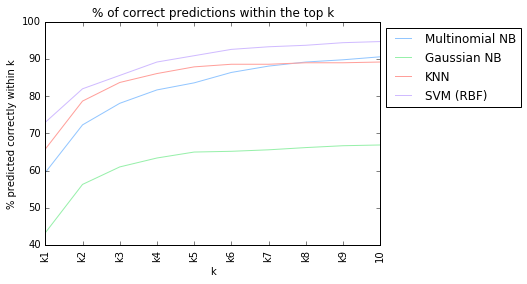

In [114]:
fig, ax = plt.subplots()

figures = []

for i in range(len(df.index)):
    figures.append(ax.plot(list(df.iloc[i][k_accuracy_cols])))
    
ax.set_title('% of correct predictions within the top k')
ax.set_xlabel('k')
ax.set_ylabel('% predicted correctly within k')
ax.set_xticklabels(map(lambda x: x[-2:], k_accuracy_cols), rotation=90, ha="center")

#_ = plt.legend(list(df.index), loc='lower right')
_ = plt.legend(list(df.index), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

## Remarks

With respect to *Accuracy*, *Log Loss*, and *'K Accuracy'*; **Linear SVC** out-performed the other algorithms:  
- Accuracy achieved was 0.65 (*with an accuracy of 90.902 with k = 10*)
- Log Loss achieved was 1.37

In [115]:
results = load_result_from_file('evaluation_results_SVCSketchClassifier_kernal-rbf_C-10.0_gamma-10.0.json')

### 20 most accurate classified sketches 

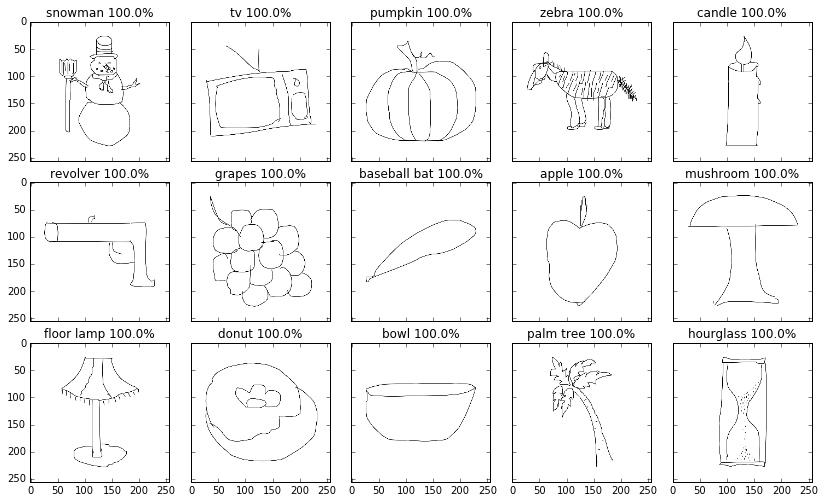

In [116]:
show_images(
    images=load_images(categories=[t[0] for t in get_categories_acccuracy(results)[:15]])[1], 
    image_categories=[t[0] for t in get_categories_acccuracy(results)[:15]], 
    title_postfix=["{}%".format(t[1]) for t in get_categories_acccuracy(results)[:15]]
)

#### Looking at other images for each category

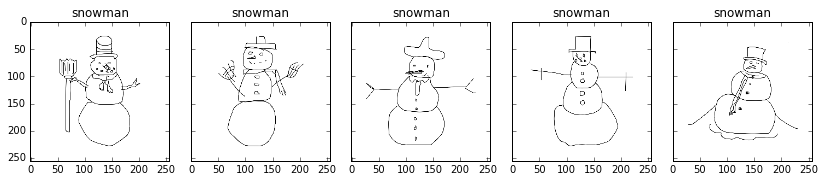

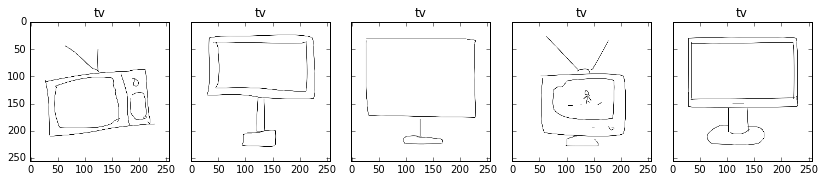

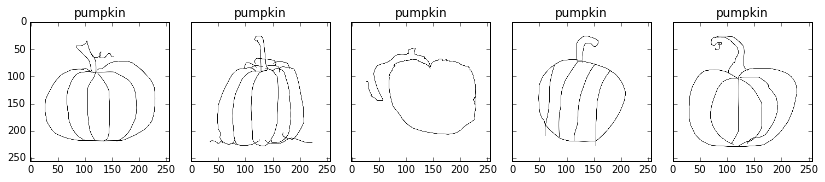

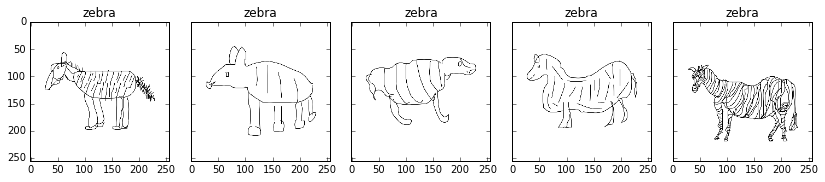

In [117]:
for category in [t[0] for t in get_categories_acccuracy(results)[:4]]:
    image_categories, images = load_images(categories=[category], category_count=5)    
    show_images(images, image_categories)

### 20 least accurate classified sketches 

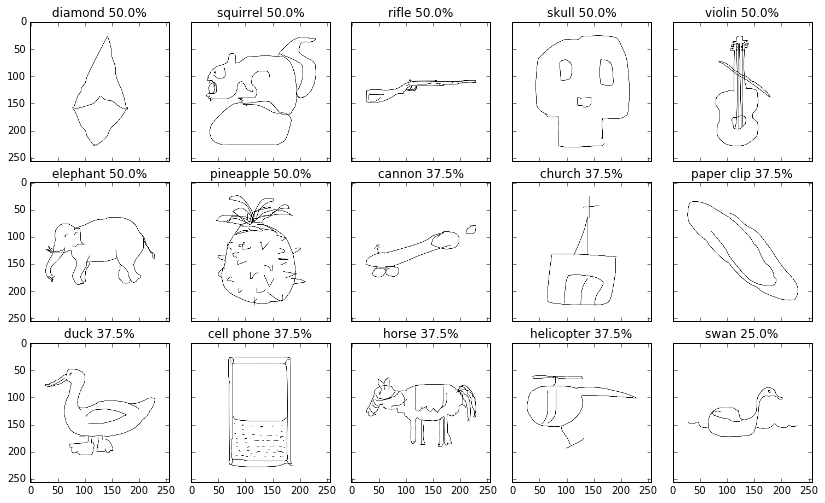

In [118]:
show_images(
    images=load_images(categories=[t[0] for t in get_categories_acccuracy(results)[-15:]])[1], 
    image_categories=[t[0] for t in get_categories_acccuracy(results)[-15:]], 
    title_postfix=["{}%".format(t[1]) for t in get_categories_acccuracy(results)[-15:]]
)

#### Looking at other images for each category

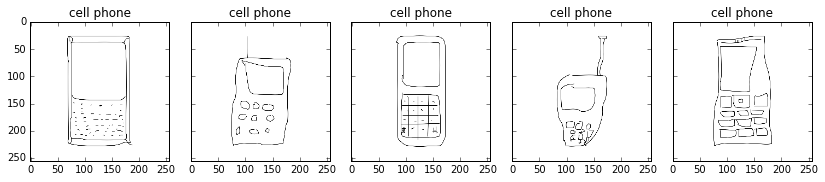

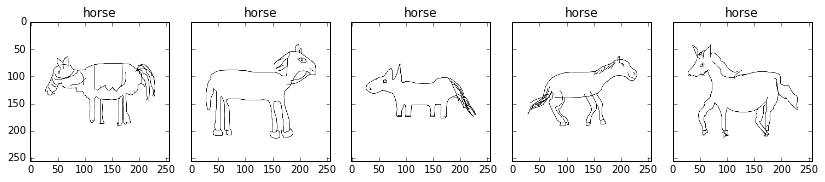

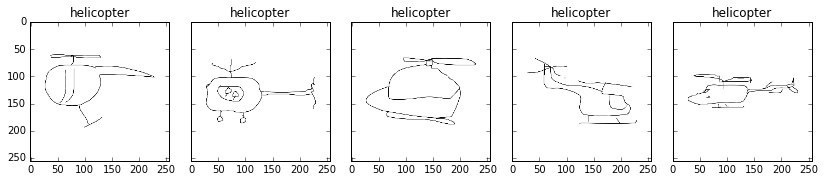

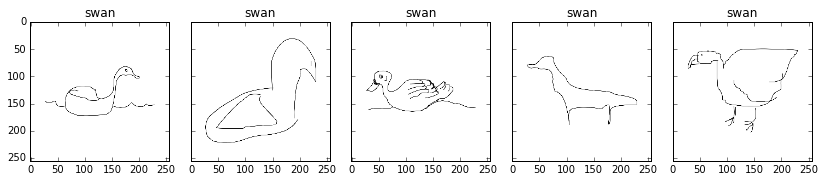

In [119]:
for category in [t[0] for t in get_categories_acccuracy(results)[-4:]]:
    image_categories, images = load_images(categories=[category], category_count=5)    
    show_images(images, image_categories)

#### Most confussed with

'duck' was most confussed with 'standing bird' (by 25.0%)


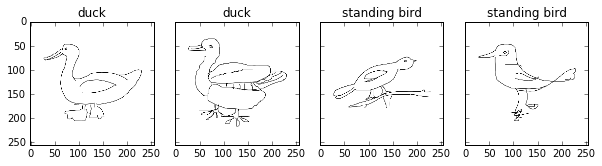

'cell phone' was most confussed with 'walkie talkie' (by 37.5%)


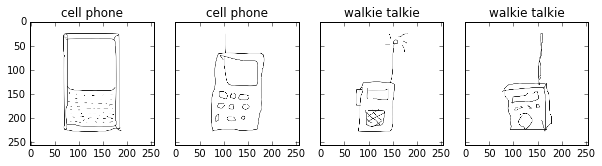

'horse' was most confussed with 'camel' (by 25.0%)


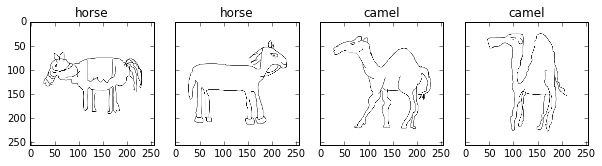

'helicopter' was most confussed with 'motorbike' (by 25.0%)


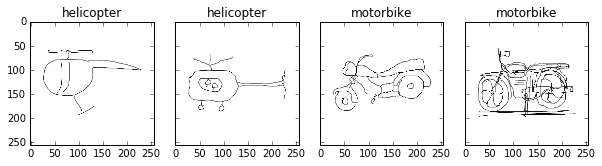

'swan' was most confussed with 'boomerang' (by 12.5%)


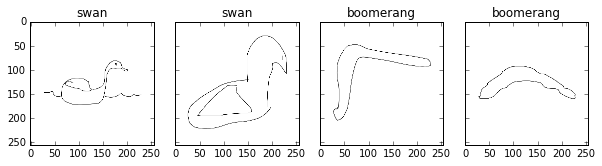

In [120]:
for category in [t[0] for t in get_categories_acccuracy(results)[-5:]]:
    res = get_categories_most_confussed(results=results, categories=[category])
    most_confussed_cat = res[0][1][0]
    most_confussed_perc = res[0][1][1]

    image_categories, images = load_images(categories=[category, most_confussed_cat], category_count=2)    
    print "'{}' was most confussed with '{}' (by {}%)".format(category, most_confussed_cat, most_confussed_perc)
    show_images(images, image_categories, cols=4, fig_size=10)

--- 

## Appendix

In [48]:
from IPython.core.display import HTML
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import json
import cv2 

%matplotlib inline
plt.style.use('seaborn-pastel')

In [19]:
k_accuracy_cols = ["accuracy_at_k{}".format(i) for i in range(1, 11)]

In [31]:
def load_results_from_files(filenames, model_identifiers):
    results_list = []
    
    for j in range(len(model_identifiers)):
        model_identifier = model_identifiers[j] 
        filename = filenames[j]
        
        results = load_result_from_file(filename=filename)
        
        results_dict = {
            "id": model_identifier, 
            "accuracy": float(results["accuracy_score"]), 
            "log_loss": float(results["log_loss"])                
        }
        k_prediction_perc_array = results["k_prediction_perc"]
        for i in range(len(k_prediction_perc_array)):
            results_dict["accuracy_at_k{}".format(i+1)] = float(k_prediction_perc_array[i])
                
        results_list.append(results_dict)
            
    df = pd.DataFrame(results_list)     
    df.set_index("id", inplace=True)
            
    return df

In [30]:
def load_result_from_file(filename):
    import os 
    results = {} 
    root_folder = "../sketchrecognition/results/"
    
    with open(root_folder + filename, "r") as f:
        results = json.load(f)
            
    return results

In [110]:
def load_results_into_df():
    filenames = [
        'evaluation_results_MultinomialNB.json',
        'evaluation_results_GaussianNB.json',
        'evaluation_results_KNeighborsClassifier_neighors-10_weights-distance_metric-manhattan_algorithm-auto.json', 
        'evaluation_results_SVCSketchClassifier_kernal-rbf_C-10.0_gamma-10.0.json', 
        'evaluation_results_LinearSVCSketchClassifier_C-18.7381742286_loss-squared_hinge.json',     
    ]

    model_identifiers = [
        'Multinomial NB', 
        'Gaussian NB',         
        'KNN', 
        'SVM (RBF)'
    ]

    return load_results_from_files(filenames, model_identifiers)

In [36]:
def get_categories_acccuracy(results):
    labels_performance = results["confusion_matrix_results"]

    label_perc_correct = []
    for label, value in labels_performance.iteritems():
        correct = float(value["correct"])
        label_perc_correct.append((label, correct))

    label_perc_correct.sort(key=lambda item: item[1], reverse=True)

    return label_perc_correct

In [74]:
def get_categories_most_confussed(results, categories):

    res = []

    for category in categories:
        if category not in results["confusion_matrix_results"]:
            continue

        value = results["confusion_matrix_results"][category]
        most_confused_dict = value["most_confused_with"]

        res.append((category, (most_confused_dict["label"], most_confused_dict["perc"])))

    return res

In [41]:
def load_images(root_folder="../png/", categories=[], category_count=1, target_size=256):
    import os 
    
    images=[]
    image_categories = []
    
    for category in categories:
        files = os.listdir("{}{}".format(root_folder, category))
        for i in range(category_count):
            image_categories.append(category)
            
            f = files[i]
            img = cv2.imread("{}{}/{}".format(root_folder, category, f), cv2.IMREAD_GRAYSCALE)
            resize_ratio = float(target_size)/float(max(img.shape[0], img.shape[1]))
            images.append(
                cv2.resize(
                    img,(int(resize_ratio * img.shape[0]), int(resize_ratio * img.shape[1])), interpolation = cv2.INTER_CUBIC
                )
            )            
            
    return image_categories, images

In [84]:
def show_images(images, image_categories, title_postfix=None, cols=5, fig_size=14):
    rows = int(float(len(images))/float(cols))
    
    fig = plt.figure(1, (fig_size, fig_size))
    
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3  # pad between axes in inch.
                    )

    for i in range(len(images)):
        if title_postfix is None or len(title_postfix) <= i:
            grid[i].set_title(image_categories[i])
        else:
            grid[i].set_title("{} {}".format(image_categories[i], title_postfix[i]))
            
        grid[i].imshow(images[i], cmap=plt.cm.Greys_r)  # The AxesGrid object work as a list of axes.

    plt.show()